### Cats and Dogs Classifier 

In [4]:
from fastprogress.fastprogress import force_console_behavior
force_console_behavior()

from fastai.vision.all import *
from fastai.callback.progress import ProgressCallback

path = untar_data(URLs.PETS)/'images'

def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed = 42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics = error_rate)
try:
    learn.remove_cbs(ProgressCallback)
except Exception:
    learn.cbs = [cb for cb in learn.cbs if not isinstance(cb, ProgressCallback)]

learn.fine_tune(1)


a:\AI-ML Track\5. Deep Learning Specialization\.venv\Lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


[0, 0.1947748064994812, 0.021566446870565414, 0.004736130125820637, '00:57']
[0, 0.06399144232273102, 0.036894191056489944, 0.010825439356267452, '01:08']


In [15]:
### Test the Model 🐱🐶
# Upload an image to classify whether it's a Cat or Dog!

import ipywidgets as widgets
uploader = widgets.FileUpload()
uploader

FileUpload(value=(), description='Upload')

Is this a cat?: True.
Probability it's a cat: 1.000000
Probability it's a dog: 0.000000


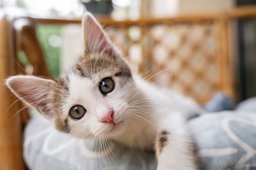

In [21]:
# Get the uploaded image (new ipywidgets API)
img_content = uploader.value[0].content.tobytes()

# Create image from bytes
img = PILImage.create(img_content)

is_cat,_,probs = learn.predict(img)

print(f"Is this a cat?: {is_cat}.")
print(f"Probability it's a cat: {probs[1].item():.6f}")
print(f"Probability it's a dog: {probs[0].item():.6f}")

img.to_thumb(256)